## Objective
The dataset is a very popular one: iris dataset. We will try to use clustering and dimensionality reduction to analyze this dataset to see if it really fit the original results

## Exploratory Data Analysis

### Loading and summary of attributes

In [1]:
from sklearn.datasets import load_iris

In [2]:
data_orig = load_iris()

In [3]:
X_orig = data_orig['data']
y_orig = data_orig['target']

The features of the X_orig are properties of the iris itselfs

In [4]:
data_orig['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The name of the target (y_orig) or type of iris are

In [5]:
data_orig['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Dimensity Reduction - PCA for Visualization

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

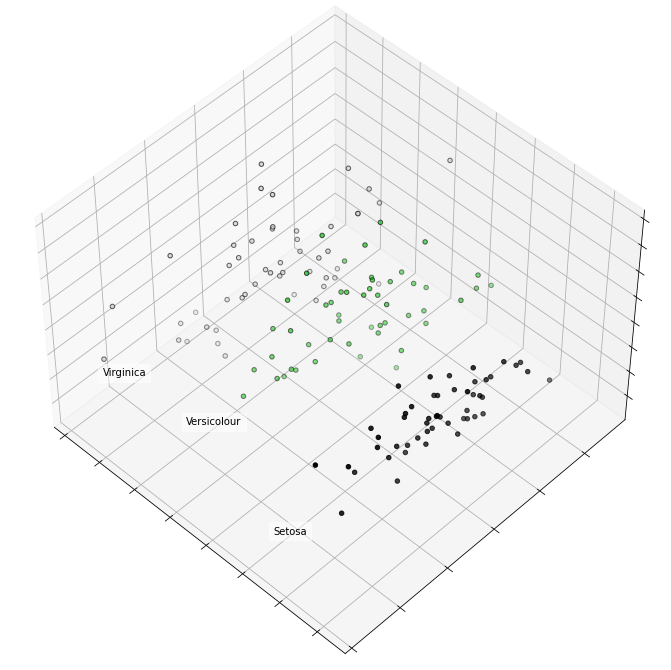

In [7]:
pca = decomposition.PCA(n_components=3)
X = pca.fit_transform(X_orig)

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
plt.cla()
y = y_orig
for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

### PCA with 2D

Text(0.5, 1.0, 'PCA of IRIS dataset')

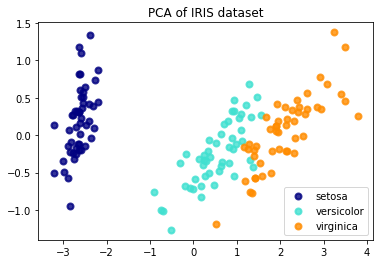

In [8]:
pca = decomposition.PCA(n_components=2)
X_r = pca.fit_transform(X_orig)
target_names = data_orig.target_names
lw=2
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")


Dimesionlity reduction of PCA to 2D or 3D both provide a clear clustering visualization. Given the information, PCA with 2 components is good enough for study.

## Unsupervised Clustering

Let's apply some clustering algorithms on 2D-PCA reduction iris datasets.

### K-means

In [9]:
from sklearn.cluster import KMeans

In [10]:
X_r.shape

(150, 2)

In [11]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

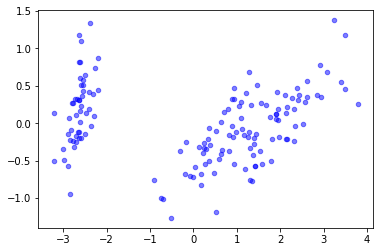

In [12]:
display_cluster(X_r)

### Determin the best clusters number

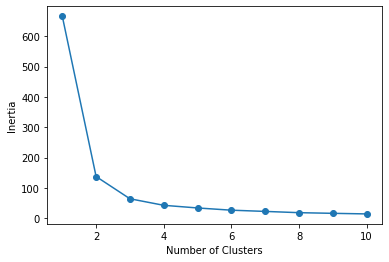

In [13]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X_r)
    inertia.append(km.inertia_)
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

Obviously, number of clusters = 3 is a goo choice (elbow method)

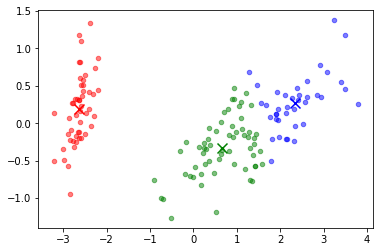

In [14]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(X_r)
display_cluster(X_r,km,num_clusters)

In [15]:
y_predict = km.predict(X_r)

In [16]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Remap the label from y_predict to y:
* '1' predict ~ '0' observed
* '0' predict ~ '1' observed
* '2' predict' ~ '2' observed

In [18]:
import pandas as pd

In [19]:
y_predict = pd.DataFrame(y_predict, columns=['y_predict'])

In [20]:
y_predict = y_predict['y_predict'].map({1:0, 0:1, 2:2})

In [21]:
y_predict

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    2
147    1
148    1
149    2
Name: y_predict, Length: 150, dtype: int64

In [22]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

The accuracy, precision and recall for labels 0, 1, 2 are:

In [23]:
accuracy_score(y, y_predict)

0.44666666666666666

In [24]:
precision_score(y, y_predict, average=None)

array([1.        , 0.07692308, 0.2295082 ])

In [25]:
recall_score(y, y_predict, average=None)

array([1.  , 0.06, 0.28])

Let's take a look at the confusion matrix

In [26]:
df_confusion = pd.crosstab(y, y_predict.values, rownames=['Actual'], colnames=['Predicted'], margins=True)

In [27]:
df_confusion

Predicted,0,1,2,All
Actual,,,,
0,50,0,0,50
1,0,3,47,50
2,0,36,14,50
All,50,39,61,150


The class 2 is misclassified quite a few with class 1, while class 0 is clearly detected.

## Conclusion

Even with simple PCA reduction with 2 components and KMeans clustering algorithm and elbow method, we could cluster the iris data without even take a look at the actually label quite well. Of course, to improve the accuracy of the model, a supervised learning algorithm should be introduced with proper label knowledge to increase the precision and recall of the prediction.